In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Metropolis Monte Carlo Method

In [5]:
# Start with some initial state configuration, 𝑥 that has energy 𝐸(𝑥)

Nsamp = 50
Nequil = 200
Nsweep = Nequil + Nsamp*300

L = 20
T = 1.5

N = L*L

sij= random.choice([-1.0,1.0],size=(L,L)) # Initialization


Ms=[]
M2s=[]

for ns in range (Nsweep): #  Metropolis sweeps
    
    for i in range(N):
        
        ii=int(random.random()*L)
        jj=int(random.random()*L) # pick random row and column 
        
        iL=[ii,jj-1] # Left Neighbour
        iR=[ii,(jj+1)%L] # Right Neighnour
        iT=[ii-1,jj] # Top Neighbour
        iB=[(ii+1)%L,jj] # Bottom Neighbour
        #an expression for the change in energy Δ𝐸
        dE = 2.0*sij[ii,jj]*(sij[iL[0],iL[1]]+sij[iR[0],iR[1]]+sij[iT[0],iT[1]]+sij[iB[0],iB[1]])
        
        if dE <= 0.: # accept the flip
            sij[ii,jj]*= -1.0 
            
        else:
            r=random.random()
            if r<= exp(-dE/T): # accept move
                sij[ii,jj]*= -1.
    if ns > Nequil:  #output sample and compute stats
        if ns % Nsamp == 0:
            
            m=sum(sij)
            Ms.append(abs(m))
            M2s.append(m*m)
    

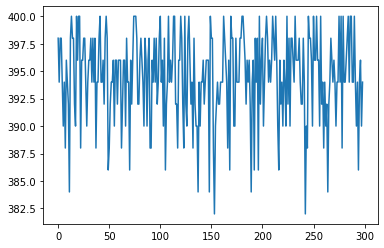

In [22]:
plot(Ms)

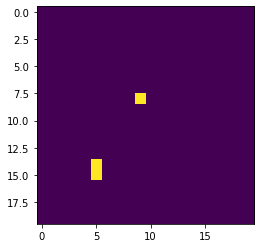

In [23]:
imshow(sij)

In [12]:
def Metropolis(T,L,Nsweep,Nequil,Nsamp):

    N = L*L

    sij= random.choice([-1.,1.],size=(L,L)) # Initialization


    Ms=[]
    M2s=[]
    Es=[]
    
    E0 = 0.0 #initial Energy 
    for ii in range(L):
        for jj in range(L):
            iL = (ii, jj - 1)
            iR = (ii, (jj + 1) % L)
            iT = (ii - 1, jj)
            iB = ((ii + 1) % L, jj)       
            E0 += -0.5*sij[ii,jj]*(sij[iL[0],iL[1]]+sij[iR[0],iR[1]]+sij[iT[0],iT[1]]+sij[iB[0],iB[1]])     

    for ns in range (Nsweep): #  Metropolis sweeps
        for i in range(N):
            ii=int(random.random()*L)
            jj=int(random.random()*L) # pick random row and column 
        
            iL=[ii,jj-1] # Left Neighbour
            iR=[ii,(jj+1)%L] # Right Neighnour
            iT=[ii-1,jj] # Top Neighbour
            iB=[(ii+1)%L,jj] # Bottom Neighbour
            #an expression for the change in energy Δ𝐸
            dE = 2.0*sij[ii,jj]*(sij[iL[0],iL[1]]+sij[iR[0],iR[1]]+sij[iT[0],iT[1]]+sij[iB[0],iB[1]])        
        
            if dE <= 0.: # accept the flip
                sij[ii,jj]*= -1.0 
            
            else:
                r=random.random()
                if r<= exp(-dE/T): # accept move
                    sij[ii,jj]*= -1.
        if ns > Nequil:  #output sample and compute stats
            if ns % Nsamp == 0:
                Es.append(E0)
                m=sum(sij)
                Ms.append(abs(m))
                M2s.append(m*m)
    return array(Es),array(Ms)

## Simulation of different lattice and temperature


In [25]:
L=15
Ts=[1.5,2.0,2.1,2.2,2.25,2.26,2.27,2.28,2.29,2.3,2.5,3.0]

Nsamp = 50
Nequil = 200
Nsweep = Nequil+Nsamp*300

Ms={}

for T in Ts:
    print("doing",T)
    Ms[T]=Metropolis(T,L,Nsweep,Nequil,Nsamp)

doing 1.5
doing 2.0
doing 2.1
doing 2.2
doing 2.25
doing 2.26
doing 2.27
doing 2.28
doing 2.29
doing 2.3
doing 2.5
doing 3.0


In [26]:
N=L*L
mavg=[]
for T in Ts:
    mavg.append(mean(abs(Ms[T]/N)))

(0, 1)

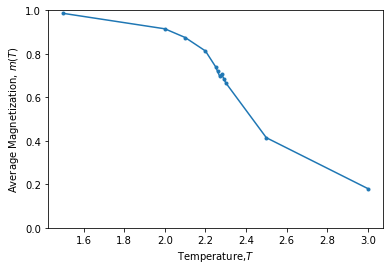

In [27]:
plot(Ts,mavg,'.-',legend="L=15")
ylabel('Average Magnetization, $m(T)$')
xlabel('Temperature,$T$')
ylim(0,1)

this was the example that Dr.Emberly showed. Next step, I will use iteration with L list, and T list. Then analyze ⟨|𝑀|⟩, $⟨𝑀^2⟩$, $⟨𝑀^4⟩$ , ⟨𝐸⟩ and $⟨𝐸^2⟩$, magnetization per spin,  specific heat per spin,susceptibility per spin, and the Binder cumulant at each L and T

In [13]:
Nsamp = 50
Nequil = 200
Nsweep = Nequil+Nsamp*300
Ts=[1.5,2.0,2.1,2.2,2.25,2.26,2.27,2.28,2.29,2.3,2.5,3.0]
Ls= [10, 15, 20, 25]

In [ ]:
Ms_list = {}
Es_list = {}


for L in Ls:
    Ms_list[L] = {}
    Es_list[L] = {}
    for T in Ts:
        print('doing', L, T)
        sij = random.choice([-1.0, 1.0], size=(L,L))
        Es_list[L][T], Ms_list[L][T] = Metropolis(T,L,Nsweep,Nequil,Nsamp) # store Energy and Magnitization

doing 10 1.5
doing 10 2.0
doing 10 2.1
doing 10 2.2
doing 10 2.25
doing 10 2.26
doing 10 2.27
doing 10 2.28
doing 10 2.29
doing 10 2.3
doing 10 2.5
doing 10 3.0
doing 15 1.5
doing 15 2.0
doing 15 2.1
doing 15 2.2
doing 15 2.25
doing 15 2.27
doing 15 2.28
doing 15 2.29
doing 15 2.3
doing 15 2.5
doing 15 3.0
doing 20 1.5
doing 20 2.0
doing 20 2.1
doing 20 2.2
doing 20 2.25
doing 20 2.26
doing 20 2.27
doing 20 2.28
doing 20 2.29
doing 20 2.3
doing 20 2.5
doing 20 3.0
doing 25 1.5
doing 25 2.0
doing 25 2.1
doing 25 2.2


In [ ]:
for L in Ls:
    Nspin = L*L
    for T in Ts:
        plot(Ts, [mean(Es_list[L][T])/Nspin ], '.-') #Energy/spin

legend(Ls)
ylabel('<E>')
xlabel('Temperature')

In [ ]:
#magnetization

for L in Ls:
    Nsping = L*L
    
    for T in Ts:
        plot(Ts, array([mean(abs(Ms_list[L][T])) ])/Nspin, '.-')
    
legend(Ls)
ylabel('<|M|>')
xlabel('T')


In [ ]:
# heat capacity 

cv = {}
for L in Ls:
    Nspin = L*L
    for T in Ts:
        cv[L] = array([(mean(Es_list[L][T]**2) - mean(Es_list[L][T])**2)/T/T/Nspin])# Cv/N = (<E^2> - <E>^2)/T^2/N
    plot(Ts, cv[L],'.-')
legend(Ls, loc=0)
ylabel(r'$c_V$')


In [ ]:
# susceptibility per spin
xm_n = {}
for L in Ls:
    Nspin = L*L
    for T in Ts:
        xm_n[L] = array([ (mean(Ms_list[L][T]**2) - mean(abs(Ms_list[L][T]))**2)/T/Nspin ])
    plot(Ts, xm_n[L],'.-')
legend(Ls)
ylabel(r'$\x_M$')
xlabel('T')

In [ ]:
binder={}
for L in Ls:
    binder[L] = []
    for T in Ts:
        binder[L].append(3/2*(1.0 - 1.0/3.0*mean(Ms_list[L][T]**4)/(mean(Ms_list[L][T]**2)**2))


In [ ]:
# A neat statistic known as the Binder cumulant doesn’t have any L dependence at the critical temperature. 
criticalT=2.27
for L in Ls:
    plot(Ts, binder[L], '.-')
legend(Ls, loc=0)
plot([criticalT, criticalT], [0,1],'r--')
xlabel('T')